In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

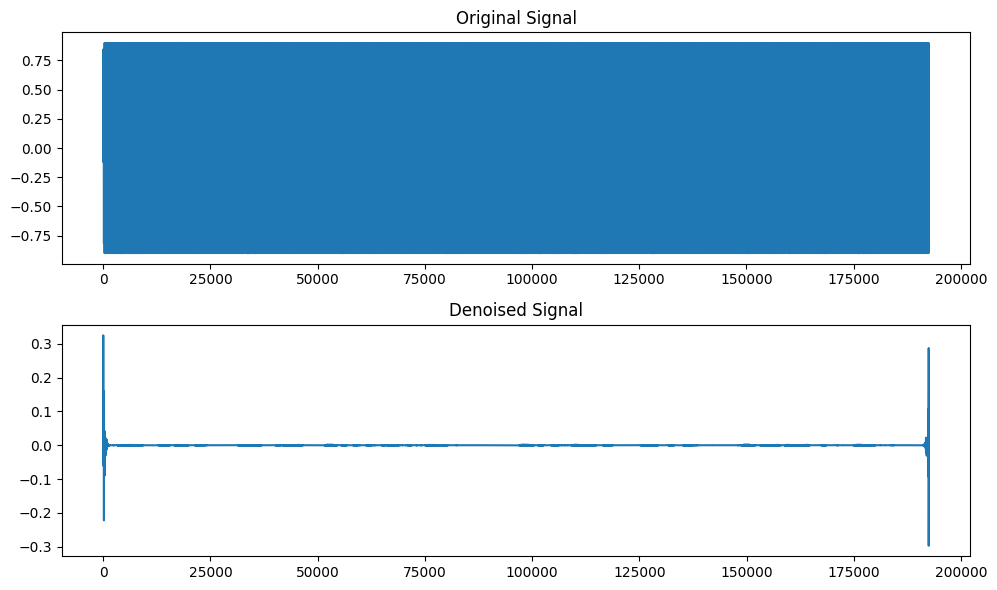

[ 7.5079955e-02  3.2462767e-01  1.3531620e-02 ... -2.3821702e-04
  7.1259490e-03 -3.3332503e-03]


In [11]:
x, sr = librosa.load('C.Noisy_Voice.wav')

X = librosa.stft(x)

# Compute the magnitude spectrogram
mag_X = np.abs(X)

# Apply spectral subtraction to reduce noise
# Adjust the parameter alpha to control the amount of noise reduction
alpha = 2
mag_X_denoised = np.maximum(0, mag_X - alpha * np.median(mag_X, axis=1, keepdims=True))

# Inverse STFT to get the denoised signal
x_denoised = librosa.istft(mag_X_denoised * np.exp(1j * np.angle(X)))

# Plot the original and denoised signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(x_denoised)
plt.title('Denoised Signal')

plt.tight_layout()
plt.show()

sf.write("clean.wav", x_denoised, sr)

print(x_denoised)

In [19]:
from pydub import AudioSegment, effects  

rawsound = AudioSegment.from_file("./clean.wav", "wav")
slice = rawsound[500:8500]  
normalizedsound = effects.normalize(slice)  
normalizedsound.export("./output.wav", format="wav")

<_io.BufferedRandom name='./output.wav'>